# P7 Airport Cancellations 

## Executive Summary
### Problem Statement
The FAA wants to cut down on delays nationwide, and the most important part of this task is understanding the characteristics and groupings of airports based on a dataset of departure and operational delays.
### Goal
ABC


In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk 
import psycopg2 as psy
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.graph_objs as go
%matplotlib inline
import sqlalchemy

pd.options.display.max_columns=100

In [2]:
airport_cancellations = pd.read_csv('assets/airport_cancellations.csv')
airport_operations = pd.read_csv('assets/Airport_operations.csv')
airports = pd.read_csv('assets/airports.csv')

### Examine Data 

In [3]:
airport_cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 37.8+ KB


In [4]:
airport_cancellations.describe(include='all')

Airport         Year  Departure Cancellations  Arrival Cancellations  \
count      805   805.000000               805.000000             805.000000   
unique      74          NaN                      NaN                    NaN   
top        LAS          NaN                      NaN                    NaN   
freq        11          NaN                      NaN                    NaN   
mean       NaN  2008.986335              1292.038509            1333.124224   
std        NaN     3.158116              1835.961943            1975.224868   
min        NaN  2004.000000                 0.000000               0.000000   
25%        NaN  2006.000000               349.000000             314.000000   
50%        NaN  2009.000000               663.000000             642.000000   
75%        NaN  2012.000000              1472.000000            1523.000000   
max        NaN  2014.000000             16618.000000           17571.000000   

        Departure Diversions  Arrival Diversions  
count             805.000000          805.000000  
unique                   NaN                 NaN  
top                      NaN                 NaN  
freq                     NaN                 NaN  
mean              173.315528          169.413665  
std               172.345539          228.521615  
min                 0.000000            0.000000  
25%                62.000000           41.000000  
50%               110.000000           84.000000  
75%               236.000000          190.000000  
max              1064.000000         1948.000000

In [5]:
airport_cancellations.Airport.value_counts()

LAS    11
MHT    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
BUR    11
SWF    11
SJC    11
TUS    11
MKE    11
SMF    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
CLE    11
LGA    11
SNA    11
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
DFW    11
IAD    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
OXR     7
RFD     6
Name: Airport, dtype: int64

Noticed 11 for all except OXR and RFD

In [7]:
airport_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

In [8]:
airport_operations.describe(include='all')

airport         year  departures for metric computation  \
count      841   841.000000                         841.000000   
unique      77          NaN                                NaN   
top        LAS          NaN                                NaN   
freq        11          NaN                                NaN   
mean       NaN  2009.028537                      108257.063020   
std        NaN     3.156497                       98278.401526   
min        NaN  2004.000000                         261.000000   
25%        NaN  2006.000000                       37653.000000   
50%        NaN  2009.000000                       72043.000000   
75%        NaN  2012.000000                      162913.000000   
max        NaN  2014.000000                      491826.000000   

        arrivals for metric computation  percent on-time gate departures  \
count                        841.000000                       841.000000   
unique                              NaN                              NaN   
top                                 NaN                              NaN   
freq                                NaN                              NaN   
mean                      107815.561237                         0.764119   
std                        97916.908601                         0.093361   
min                          259.000000                         0.246700   
25%                        37502.000000                         0.745700   
50%                        71254.000000                         0.782500   
75%                       160775.000000                         0.809800   
max                       486799.000000                         0.909700   

        percent on-time airport departures  percent on-time gate arrivals  \
count                           841.000000                     841.000000   
unique                                 NaN                            NaN   
top                                    NaN                            NaN   
freq                                   NaN                            NaN   
mean                              0.714283                       0.754281   
std                               0.101271                       0.082302   
min                               0.245700                       0.324100   
25%                               0.684800                       0.737500   
50%                               0.737200                       0.768300   
75%                               0.772200                       0.796500   
max                               0.897400                       0.880300   

        average_gate_departure_delay  average_taxi_out_time  \
count                     841.000000             841.000000   
unique                           NaN                    NaN   
top                              NaN                    NaN   
freq                             NaN                    NaN   
mean                       13.561403              13.703389   
std                         4.746563               3.792181   
min                         5.350000               7.040000   
25%                        10.910000              11.260000   
50%                        12.640000              12.810000   
75%                        14.950000              15.650000   
max                        40.800000              35.760000   

        average taxi out delay  average airport departure delay  \
count               841.000000                       841.000000   
unique                     NaN                              NaN   
top                        NaN                              NaN   
freq                       NaN                              NaN   
mean                  3.519750                        16.249964   
std                   2.391278                         5.353012   
min                   0.000000                         6.290000   
25%                   2.210000                        12.950000   
50%             

In [11]:
airport_operations.airport.value_counts()

LAS    11
BUR    11
VNY    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
GYY    11
SAT    11
RDU    11
MEM    11
ISP    11
TEB    11
MHT    11
SJC    11
SWF    11
MKE    11
ONT    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
BDL    11
DFW    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

In [12]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
Key                        5164 non-null float64
LocID                      5152 non-null object
AP_NAME                    5164 non-null object
ALIAS                      3498 non-null object
Facility Type              5164 non-null object
FAA REGION                 5164 non-null object
COUNTY                     5164 non-null object
CITY                       5164 non-null object
STATE                      5164 non-null object
AP Type                    5164 non-null object
Latitude                   5164 non-null float64
Longitude                  5164 non-null float64
Boundary Data Available    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [23]:
airports.describe(include='all')

Key LocID         AP_NAME                         ALIAS  \
count   5164.000000  5152            5164                          3498   
unique          NaN  5152            4956                          3350   
top             NaN   3A4  JACKSON COUNTY  Greenville Municipal Airport   
freq            NaN     1               5                             5   
mean    2786.645236   NaN             NaN                           NaN   
std     1493.693985   NaN             NaN                           NaN   
min      203.000000   NaN             NaN                           NaN   
25%     1493.750000   NaN             NaN                           NaN   
50%     2784.500000   NaN             NaN                           NaN   
75%     4075.250000   NaN             NaN                           NaN   
max     5375.000000   NaN             NaN                           NaN   

       Facility Type FAA REGION      COUNTY     CITY STATE     AP Type  \
count           5164       5164        5164     5164  5164        5164   
unique             1          9        1577     3745    54           2   
top          Airport        AGL  WASHINGTON  HOUSTON    AK  Public Use   
freq            5164       1074          52       18   406        4876   
mean             NaN        NaN         NaN      NaN   NaN         NaN   
std              NaN        NaN         NaN      NaN   NaN         NaN   
min              NaN        NaN         NaN      NaN   NaN         NaN   
25%              NaN        NaN         NaN      NaN   NaN         NaN   
50%              NaN        NaN         NaN      NaN   NaN         NaN   
75%              NaN        NaN         NaN      NaN   NaN         NaN   
max              NaN        NaN         NaN      NaN   NaN         NaN   

           Latitude    Longitude Boundary Data Available  
count   5164.000000  5164.000000                    5164  
unique          NaN          NaN                       2  
top             NaN          NaN                     Yes  
freq            NaN          NaN                    3498  
mean      40.669348   -98.817645                     NaN  
std        7.988298    20.953579                     NaN  
min       17.701556  -177.381308                     NaN  
25%       35.233926  -109.377947                     NaN  
50%       40.125768   -94.145112                     NaN  
75%       44.091535   -84.230004                     NaN  
max       71.284889   -64.801722                     NaN

In [73]:
# join databases - inner joins to keep only information available across all.
airport_cancellations_and_operations = pd.merge(airport_cancellations, airport_operations, how='inner', left_on=['Airport', 'Year'], right_on=['airport', 'year'])
data = pd.merge(airport_cancellations_and_operations, airports, how='inner', left_on='Airport', right_on='LocID')

In [74]:
#eliminate duplicate columns in joined database
data.drop(['airport', 'year', 'LocID'], axis=1, inplace=True)

In [75]:
#rename the columns to allow for dot notation.
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

### Part 3: Data Mining

In [95]:
#drop columns that don't provide useful data
air = data.drop(['key', 'facility_type', 'ap_name', 'alias', 'county', 'boundary_data_available', 'city', 'state'], axis=1)

In [96]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 23 columns):
airport                               799 non-null object
year                                  799 non-null float64
departure_cancellations               799 non-null float64
arrival_cancellations                 799 non-null float64
departure_diversions                  799 non-null float64
arrival_diversions                    799 non-null float64
departures_for_metric_computation     799 non-null int64
arrivals_for_metric_computation       799 non-null int64
percent_on-time_gate_departures       799 non-null float64
percent_on-time_airport_departures    799 non-null float64
percent_on-time_gate_arrivals         799 non-null float64
average_gate_departure_delay          799 non-null float64
average_taxi_out_time                 799 non-null float64
average_taxi_out_delay                799 non-null float64
average_airport_departure_delay       799 non-null float64
average_airborn

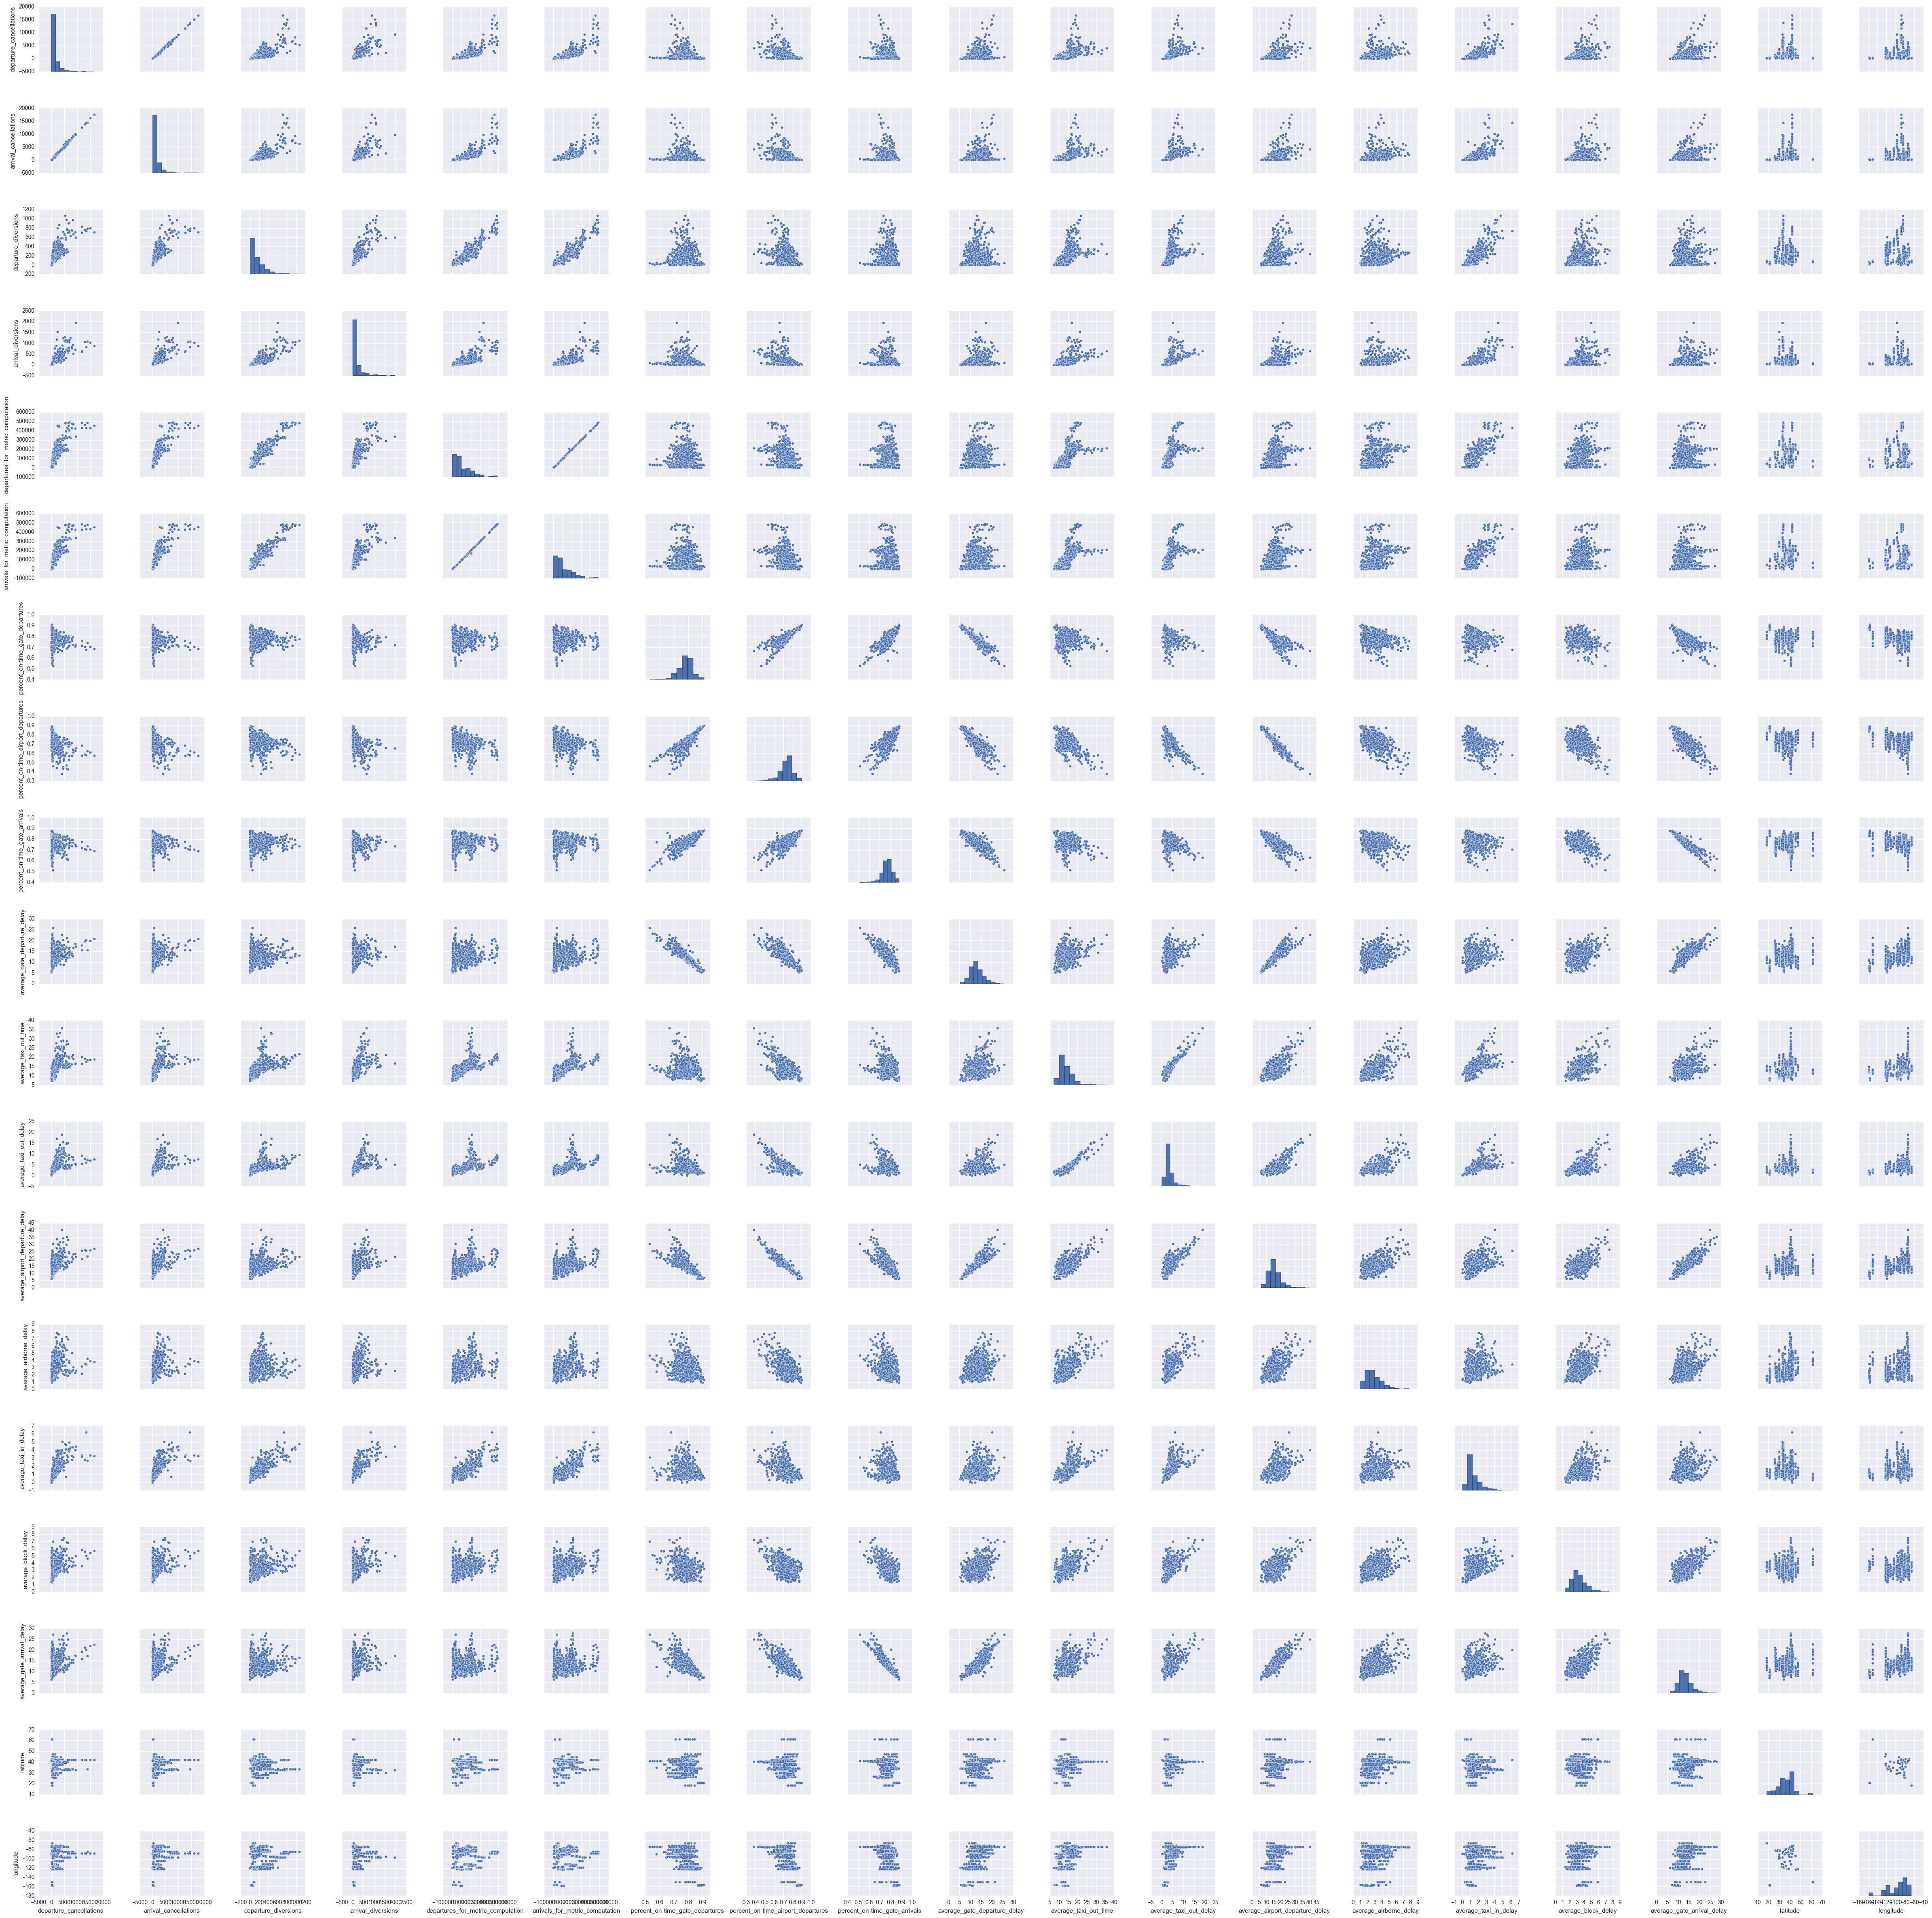

In [99]:
#check data normality & colinearity
sns.pairplot(air.drop('year', axis=1))

In [98]:
for col in air.drop(['year', 'airport', 'faa_region', 'ap_type'], axis=1).columns:
    print col
    print stats.describe(air[col])
    print '\n'

departure_cancellations
DescribeResult(nobs=799, minmax=(0.0, 16618.0), mean=1299.3141426783479, variance=3388828.8397872034, skewness=3.8317639299787563, kurtosis=20.031306868171377)


arrival_cancellations
DescribeResult(nobs=799, minmax=(0.0, 17571.0), mean=1341.0688360450563, variance=3922221.3824737058, skewness=3.8095715001350854, kurtosis=19.550769586464156)


departure_diversions
DescribeResult(nobs=799, minmax=(0.0, 1064.0), mean=174.25031289111388, variance=29804.019971706486, skewness=2.0190336237818682, kurtosis=4.718886822939413)


arrival_diversions
DescribeResult(nobs=799, minmax=(0.0, 1948.0), mean=170.25657071339174, variance=52515.536845869363, skewness=3.038166788203641, kurtosis=11.599317755260667)


departures_for_metric_computation
DescribeResult(nobs=799, minmax=(731, 491826), mean=113471.56821026283, variance=9615595852.7794895, skewness=1.5165353715965488, kurtosis=2.428182244088746)


arrivals_for_metric_computation
DescribeResult(nobs=799, minmax=(717, 486799

Most data are right-skewed, a couple left-skewed. Only a few seem normal.
Colinearity: departures_for_metric_computation is almost perfectly colinear with arrivals_for_metric_computation; arrival_cancellations is very strongly correlated with departure_cancellations.

In [102]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 23 columns):
airport                               799 non-null object
year                                  799 non-null float64
departure_cancellations               799 non-null float64
arrival_cancellations                 799 non-null float64
departure_diversions                  799 non-null float64
arrival_diversions                    799 non-null float64
departures_for_metric_computation     799 non-null int64
arrivals_for_metric_computation       799 non-null int64
percent_on-time_gate_departures       799 non-null float64
percent_on-time_airport_departures    799 non-null float64
percent_on-time_gate_arrivals         799 non-null float64
average_gate_departure_delay          799 non-null float64
average_taxi_out_time                 799 non-null float64
average_taxi_out_delay                799 non-null float64
average_airport_departure_delay       799 non-null float64
average_airborn

In [109]:
# standardize
air_std = StandardScaler().fit_transform(air.drop(['airport', 'year', 'faa_region', 'ap_type'], axis=1))
air_std = pd.DataFrame(air_std, columns=air.drop(['airport', 'year', 'faa_region', 'ap_type'],axis=1).columns)
air_std = air_std.join(air[['airport', 'year', 'faa_region', 'ap_type']])

In [111]:
# dummies
air_std_dum = pd.get_dummies(air_std)

### PCA: Manual and sklearn

In [94]:
air.head()

year  departure_cancellations  arrival_cancellations  \
0  2004.0                    242.0                  235.0   
1  2005.0                    221.0                  190.0   
2  2006.0                    392.0                  329.0   
3  2007.0                    366.0                  304.0   
4  2008.0                    333.0                  300.0   

   departure_diversions  arrival_diversions  \
0                  71.0                46.0   
1                  61.0                33.0   
2                  71.0               124.0   
3                 107.0                45.0   
4                  79.0                42.0   

   departures_for_metric_computation  arrivals_for_metric_computation  \
0                              53971                            53818   
1                              51829                            51877   
2                              49682                            51199   
3                              53255                            53611   
4                              49589                            49512   

   percent_on-time_gate_departures  percent_on-time_airport_departures  \
0                           0.8030                              0.7809   
1                           0.8140                              0.7922   
2                           0.7983                              0.7756   
3                           0.8005                              0.7704   
4                           0.8103                              0.7844   

   percent_on-time_gate_arrivals  average_gate_departure_delay  \
0                         0.7921                         10.38   
1                         0.8001                          9.60   
2                         0.7746                         10.84   
3                         0.7647                         11.29   
4                         0.7875                         10.79   

   average_taxi_out_time  average_taxi_out_delay  \
0                   9.89                    2.43   
1                   9.79                    2.29   
2                   9.89                    2.16   
3                  10.34                    2.40   
4                  10.41                    2.41   

   average_airport_departure_delay  average_airborne_delay  \
0                            12.10                    2.46   
1                            11.20                    2.26   
2                            12.33                    2.12   
3                            12.95                    2.19   
4                            12.32                    1.82   

   average_taxi_in_delay  average_block_delay  average_gate_arrival_delay  \
0                   0.83                 2.55                       10.87   
1                   0.89                 2.34                       10.24   
2                   0.84                 2.66                       11.82   
3                   1.29                 3.06                       12.71   
4                   1.03                 2.79                       11.48   

    latitude   longitude  airport_ABQ  airport_ANC  airport_ATL  airport_AUS  \
0  35.040194 -106.609194            1            0            0            0   
1  35.040194 -106.609194            1            0            0            0   
2  35.040194 -106.609194            1            0            0            0   
3  35.040194 -106.609194            1            0            0            0   
4  35.040194 -106.609194            1            0            0            0   

   airport_BDL  airport_BHM  airport_BNA  airport_BOS  airport_BUF  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   airport_BUR  airport

In [136]:
#establish dataframe for PCA and isolate target variable
cov_mat = np.cov(air_std_dum.transpose())

In [138]:
#dataframe to more easily view the covariance matrix
pd.DataFrame(cov_mat, columns=air_std_dum.columns, index=air_std_dum.columns)

departure_cancellations  \
departure_cancellations                            1.001253   
arrival_cancellations                              0.998714   
departure_diversions                               0.797383   
arrival_diversions                                 0.793246   
departures_for_metric_computation                  0.809973   
arrivals_for_metric_computation                    0.811009   
percent_on-time_gate_departures                   -0.184192   
percent_on-time_airport_departures                -0.466797   
percent_on-time_gate_arrivals                     -0.113505   
average_gate_departure_delay                       0.292119   
average_taxi_out_time                              0.566812   
average_taxi_out_delay                             0.600422   
average_airport_departure_delay                    0.505572   
average_airborne_delay                             0.377300   
average_taxi_in_delay                              0.724422   
average_block_delay                                0.397425   
average_gate_arrival_delay                         0.326013   
latitude                                           0.122502   
longitude                                          0.159656   
year                                              -0.236261   
airport_ABQ                                       -0.007626   
airport_ANC                                       -0.007656   
airport_ATL                                        0.039434   
airport_AUS                                       -0.006182   
airport_BDL                                       -0.005919   
airport_BHM                                       -0.007373   
airport_BNA                                       -0.003653   
airport_BOS                                        0.013397   
airport_BUF                                       -0.006052   
airport_BUR                                       -0.006526   
...                                                     ...   
airport_PSP                                       -0.006253   
airport_PVD                                       -0.006951   
airport_RDU                                       -0.001208   
airport_RFD                                       -0.005297   
airport_RSW                                       -0.007808   
airport_SAN                                       -0.002180   
airport_SAT                                       -0.006363   
airport_SDF                                       -0.007314   
airport_SEA                                       -0.003961   
airport_SFO                                        0.010627   
airport_SJC                                       -0.005259   
airport_SJU                                       -0.007879   
airport_SLC                                       -0.002292   
airport_SMF                                       -0.004414   
airport_SNA                                       -0.005347   
airport_STL                                       -0.002820   
airport_SWF                                       -0.009338   
airport_TPA                                       -0.004953   
airport_TUS                                       -0.008470   
faa_region_AAL                                    -0.007656   
faa_region_ACE                                    -0.013938   
faa_region_AEA                                     0.040763   
faa_region_AGL                                     0.056609   
faa_region_ANE                                    -0.007108   
faa_region_ANM                                    -0.001783   
faa_region_ASO                                    -0.018256   
faa_region_ASW                                     0.011528   
faa_region_AWP                                    -0.060160   
ap_type_Federalized/Commercial                    -0.015418   
ap_type_Public Use                                 0.015418   

                                    arrival_cancellations  \
departure_cancellations                          0.998714   
arrival

In [139]:
#get eigenvalues and eigenvectors from the covariance matrix
eValue, eVector = np.linalg.eig(cov_mat)

In [147]:
# Make a list of (eigenvalue, eigenvector) tuples
ePairs = [(np.abs(eValue[i]), np.abs(eVector[:,i])) for i in range(len(eValue))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
ePairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
ePairs

[(10.865993278212191,
  array([  1.47401781e-01,   1.45513893e-01,   1.22450216e-01,
           1.29322596e-01,   1.39320341e-01,   1.38918733e-01,
           8.45896308e-02,   1.51406770e-01,   1.11087973e-01,
           8.81607685e-02,   1.48205916e-01,   1.76491341e-01,
           1.47378716e-01,   1.85418583e-01,   1.35545177e-01,
           1.89981483e-01,   1.24910834e-01,   3.57775607e-02,
           6.53173357e-02,   8.06386328e-01,   2.04619891e-03,
           3.62722531e-04,   5.48652256e-03,   1.34791733e-03,
           9.23897797e-04,   1.17028092e-03,   8.72014801e-04,
           1.97596193e-03,   4.62868541e-04,   2.18619989e-03,
           1.41323713e-04,   3.51338084e-04,   1.35635382e-03,
           3.01893557e-04,   6.78501430e-04,   1.28633377e-03,
           4.21171018e-04,   1.84388033e-03,   3.70717122e-03,
           1.48327118e-03,   5.79286949e-03,   5.07936784e-04,
           2.61309323e-03,   4.23487818e-04,   2.57690249e-03,
           1.61748086e-03,   2.23

In [115]:
#sklearn PCA model
pca = sklearnPCA()
pca.fit(air_std_dum)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [135]:
# make table of correlations with our original dimensions and the principal components
PCAs = pd.DataFrame(pca.transform(air_std_dum), columns=["PCA_"+str(i+1) for i in range(0,105)])
PCAs.join(air_std_dum).corr().round(3).ix['PCA_1':'PCA_105', 105:]

departure_cancellations  arrival_cancellations  departure_diversions  \
PCA_1                      0.486                  0.479                 0.403   
PCA_2                      0.640                  0.637                 0.614   
PCA_3                     -0.390                 -0.413                -0.581   
PCA_4                      0.131                  0.135                 0.155   
PCA_5                      0.223                  0.231                 0.088   
PCA_6                     -0.035                 -0.034                -0.027   
PCA_7                      0.205                  0.198                -0.009   
PCA_8                      0.266                  0.241                -0.153   
PCA_9                     -0.069                 -0.067                 0.042   
PCA_10                    -0.095                 -0.105                -0.001   
PCA_11                     0.066                  0.058                -0.138   
PCA_12                     0.037                  0.035                -0.103   
PCA_13                    -0.012                 -0.018                -0.034   
PCA_14                    -0.004                 -0.003                 0.035   
PCA_15                     0.010                  0.003                -0.059   
PCA_16                    -0.019                 -0.021                -0.002   
PCA_17                    -0.030                 -0.033                 0.039   
PCA_18                     0.017                  0.015                 0.031   
PCA_19                     0.017                  0.017                -0.070   
PCA_20                     0.002                  0.014                 0.121   
PCA_21                     0.003                 -0.002                 0.021   
PCA_22                    -0.006                 -0.015                -0.081   
PCA_23                    -0.005                  0.000                 0.002   
PCA_24                    -0.002                  0.001                -0.006   
PCA_25                     0.000                  0.002                -0.004   
PCA_26                    -0.016                  0.018                -0.000   
PCA_27                     0.015                 -0.014                 0.002   
PCA_28                     0.001                 -0.001                 0.000   
PCA_29                    -0.000                  0.000                -0.000   
PCA_30                     0.000                  0.000                 0.000   
...                          ...                    ...                   ...   
PCA_76                     0.004                  0.001                 0.014   
PCA_77                    -0.004                 -0.003                 0.013   
PCA_78                     0.002                  0.004                -0.008   
PCA_79                    -0.001                  0.000                 0.009   
PCA_80                    -0.008                 -0.002                -0.003   
PCA_81                     0.001                 -0.001                -0.002   
PCA_82                    -0.001                 -0.002                -0.005   
PCA_83                    -0.002                  0.001                -0.002   
PCA_84                    -0.003                  0.003                -0.004   
PCA_85                    -0.000                  0.002                 0.000   
PCA_86                     0.000                 -0.001                 0.000   
PCA_87                     0.000                 -0.001                -0.001   
PCA_88                    -0.015                  0.015                -0.000   
PCA_89                     0.004                 -0.004                 0.000   
PCA_90                    -0.003                  0.003                -0.000   
PCA_91                    -0.000                  0.000                 0.000   
PCA_92                     0.032                  0.027                -0.085   
PCA_93                     0.133        

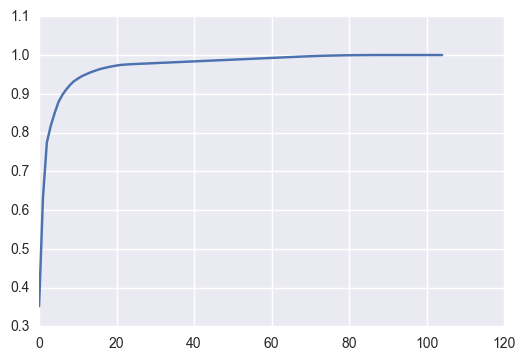

In [121]:
plt.plot(pca.explained_variance_ratio_.cumsum())

### 3D Plot dataset with PCA applied


## Executive Summary and conclusions

Score: | /30
    ----|----
Identify: Problem Statement + Goals |
Acquire: Create Postgres database + Join tables |
Parse: Query Data + Describe Risks/Assumptions|
Parse: 3D Plot and describe data|
Mine: Format and clean data|
Refine: Define distribution and correlations|
Model: Conduct PCA manually and with sklearn|
Present: Create formal report: problem, findings, examples, recommendations|
Dynamic Tableau visualization|
Create blog post summary| 